## Advanced Linear Regression


### Read Data and Clean it

In [365]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [366]:
#!pip install seaborn
import warnings
warnings.filterwarnings('ignore')

### Read the data and get basic info 

In [367]:
data = pd.read_csv("train.csv")
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [368]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(1460, 81)

In [369]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Find null or empty values

In [370]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

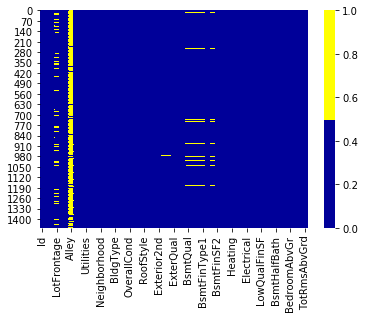

In [371]:
# Displaying null value presense as heatMap
cols = data.columns[:55] # first 55 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

## Removing data where number of null value is greater than 10%

In [372]:

round(data.isnull().sum()/len(data.index),2)[round(data.isnull().sum()/
                                                                 len(data.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [373]:
data = data.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')


## Sampling Data

In [374]:
#Convert the years with Age

data['YearBuilt_Old'] = data.YearBuilt.max()-data.YearBuilt
data['YearRemodAdd_Old'] = data.YearRemodAdd.max()-data.YearRemodAdd
data['GarageYrBlt_Old'] = data.GarageYrBlt.max()-data.GarageYrBlt
data['YrSold_Old'] = data.YrSold.max()-data.YrSold
data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].head(5)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,2003,2003,2003.0,2008,7,7,7.0,2
1,1976,1976,1976.0,2007,34,34,34.0,3
2,2001,2002,2001.0,2008,9,8,9.0,2
3,1915,1970,1998.0,2006,95,40,12.0,4
4,2000,2000,2000.0,2008,10,10,10.0,2


In [375]:
data = data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')


## Fill missing values

In [376]:
data.MasVnrType.fillna('None',inplace=True)
data.MasVnrArea.fillna(data.MasVnrArea.mean(),inplace=True)
data.BsmtQual.fillna('TA',inplace=True)
data.BsmtCond.fillna('TA',inplace=True)
data.BsmtExposure.fillna('No',inplace=True)
data.BsmtFinType1.fillna('Unf',inplace=True)
data.BsmtFinType2.fillna('Unf',inplace=True)
data.GarageType.fillna('Attchd',inplace=True)
data.GarageYrBlt_Old.fillna(-1,inplace=True)
data.GarageFinish.fillna('Unf',inplace=True)
data.GarageQual.fillna('TA',inplace=True)
data.GarageCond.fillna('TA',inplace=True)

## Correlation Map

In [377]:
cor = data.corr()

In [378]:
#plt.figure(figsize=(15,10))
#sns.heatmap(cor,annot=True)
#plt.show()
cor


,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917,0.012713,0.021998,0.003933,-0.000712
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.084284,-0.027850,-0.040581,-0.101871,0.021407
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.103960,0.214103,0.111170,-0.002618,0.260833,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,-0.014228,-0.013788,0.045621,0.014261
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.410238,0.239666,-0.059119,0.308159,0.537808,...,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,-0.572323,-0.550684,-0.417182,0.027347
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,...,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856,0.375983,-0.073741,0.295301,-0.043950
MasVnrArea,-0.050199,0.022895,0.103960,0.410238,-0.127788,1.000000,0.263582,-0.072302,0.114184,0.362452,...,-0.109849,0.018795,0.061453,0.011723,-0.029815,0.475241,-0.314745,-0.179186,-0.202423,0.008184
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.263582,1.000000,-0.050117,-0.495251,0.522396,...,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,-0.249503,-0.128451,-0.111591,-0.014359
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.072302,-0.050117,1.000000,-0.209294,0.104810,...,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.049107,0.067759,0.094986,-0.031706
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.114184,-0.495251,-0.209294,1.000000,0.415360,...,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,-0.149040,-0.181133,-0.167996,0.041258
TotalBsmtSF,-0.015415,-0.238518,0.260833,0.537808,-0.171098,0.362452,0.522396,0.104810,0.415360,1.000000,...,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,-0.391452,-0.291066,-0.250294,0.014969


In [379]:
#convert from int type to object in order to treat it as  categorical variables
data['MSSubClass'] = data['MSSubClass'].astype('object')
data['OverallQual'] = data['OverallQual'].astype('object')
data['OverallCond'] = data['OverallCond'].astype('object')
data['BsmtFullBath'] = data['BsmtFullBath'].astype('object')
data['BsmtHalfBath'] = data['BsmtHalfBath'].astype('object')
data['FullBath'] = data['FullBath'].astype('object')
data['HalfBath'] = data['HalfBath'].astype('object')
data['BedroomAbvGr'] = data['BedroomAbvGr'].astype('object')
data['KitchenAbvGr'] = data['KitchenAbvGr'].astype('object')
data['TotRmsAbvGrd'] = data['TotRmsAbvGrd'].astype('object')
data['Fireplaces'] = data['Fireplaces'].astype('object')
data['GarageCars'] = data['GarageCars'].astype('object')

In [380]:
data.shape


(1460, 74)

## Replace dummy variables

In [381]:
mapList =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
data[mapList] = data[mapList].apply(binary_map)

In [382]:
mapList =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
data[mapList] = data[mapList].apply(binary_map)

In [383]:
mapList =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
data[mapList] = data[mapList].apply(binary_map)

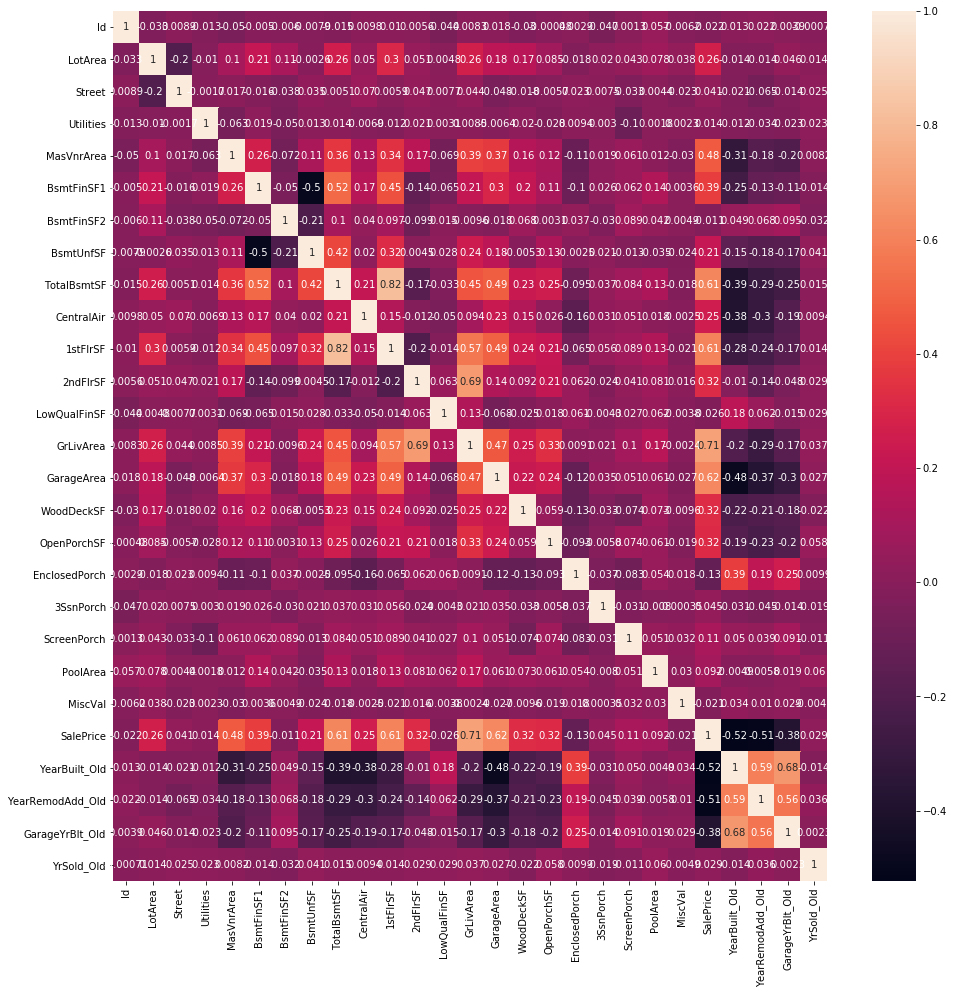

In [384]:
plt.figure(figsize=(16,16))
sns.heatmap(data[list(data.dtypes[data.dtypes!='object'].index)].corr(),annot=True)
plt.show()

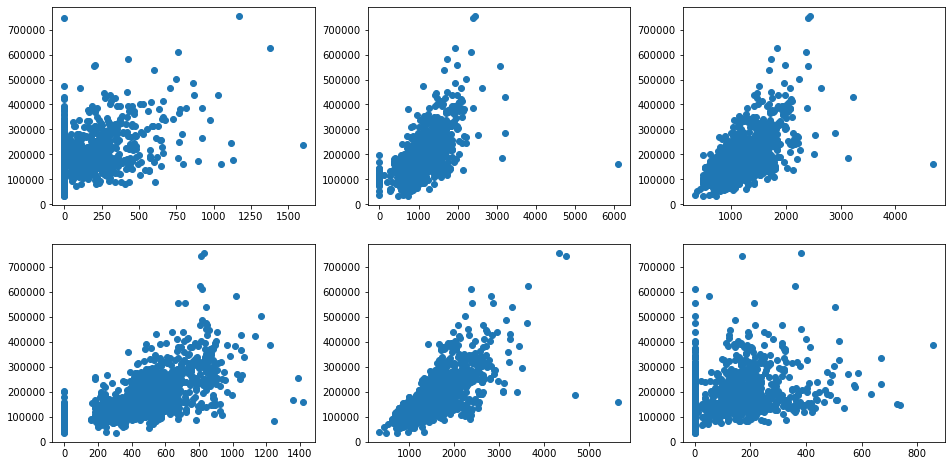

In [385]:
# Scatter plot to find corelation
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(data.MasVnrArea,data.SalePrice)
plt.subplot(2,3,2)
plt.scatter(data.TotalBsmtSF,data.SalePrice)
plt.subplot(2,3,3)
plt.scatter(data['1stFlrSF'],data.SalePrice)
plt.subplot(2,3,4)
plt.scatter(data['GarageArea'],data.SalePrice)
plt.subplot(2,3,5)
plt.scatter(data['GrLivArea'],data.SalePrice)
plt.subplot(2,3,6)
plt.scatter(data['WoodDeckSF'],data.SalePrice)

# Data Preperation:

In [386]:
X = data.drop(['Id'],axis=1)
X.head()


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,60,RL,8450,1,Reg,Lvl,1,Inside,Gtl,CollgCr,...,0,0,0,WD,Normal,208500,7,7,7.0,2
1,20,RL,9600,1,Reg,Lvl,1,FR2,Gtl,Veenker,...,0,0,0,WD,Normal,181500,34,34,34.0,3
2,60,RL,11250,1,IR1,Lvl,1,Inside,Gtl,CollgCr,...,0,0,0,WD,Normal,223500,9,8,9.0,2
3,70,RL,9550,1,IR1,Lvl,1,Corner,Gtl,Crawfor,...,0,0,0,WD,Abnorml,140000,95,40,12.0,4
4,60,RL,14260,1,IR1,Lvl,1,FR2,Gtl,NoRidge,...,0,0,0,WD,Normal,250000,10,10,10.0,2


In [387]:
# creating dummy variables for categorical variables
data_categorical = X.select_dtypes(include=['object'])
data_categorical.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Typ,0,Attchd,RFn,2,TA,TA,Y,WD,Normal
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Typ,1,Detchd,Unf,3,TA,TA,Y,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,Typ,1,Attchd,RFn,3,TA,TA,Y,WD,Normal


In [388]:
# convert into dummies
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [389]:
# drop parent categorical variables 
data = data.drop(list(data_categorical.columns), axis=1)

In [390]:
# Join Data with dummies data

data = pd.concat([data, data_dummies], axis=1)

In [391]:
data.head()

,Id,LotArea,Street,Utilities,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,1,1,196.0,706,0,150,856,1,...,0,0,0,0,1,0,0,0,1,0
1,2,9600,1,1,0.0,978,0,284,1262,1,...,0,0,0,0,1,0,0,0,1,0
2,3,11250,1,1,162.0,486,0,434,920,1,...,0,0,0,0,1,0,0,0,1,0
3,4,9550,1,1,0.0,216,0,540,756,1,...,0,0,0,0,1,0,0,0,0,0
4,5,14260,1,1,350.0,655,0,490,1145,1,...,0,0,0,0,1,0,0,0,1,0


In [392]:
# Drop Outliers
num_col = list(data.dtypes[data.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x 

data = drop_outliers(data)
data.shape


(1441, 289)

## SPLIT into X and Y
- Perform Scaling

In [393]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

df_train,df_test = train_test_split(data,train_size=0.7,test_size=0.3,random_state=42)
num_col = ['LotArea',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

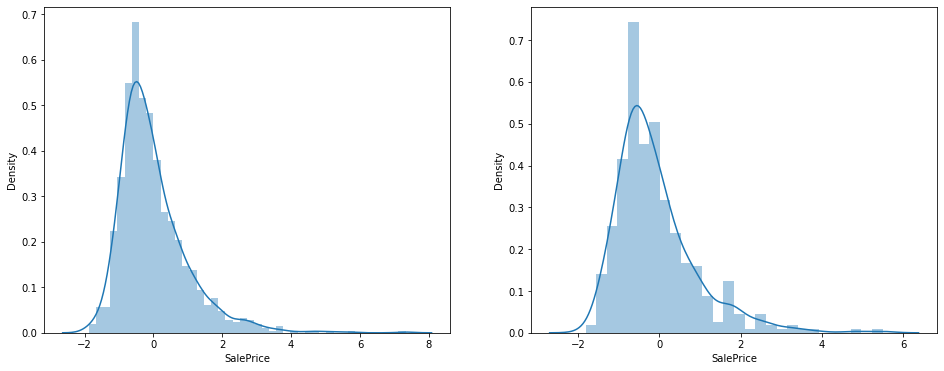

In [394]:
#Lets Check the distribution after scaling
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [395]:
# Splitting Independent n dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train



In [396]:
print(y_train)

1180    0.867245
445    -0.699589
986    -0.833889
416    -0.418199
767    -0.283899
          ...   
1107    1.183489
1142    3.103916
1310    1.954436
871     0.234116
1138    0.176559
Name: SalePrice, Length: 1008, dtype: float64


In [397]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [398]:
# Use RFE to find optimal number of features

In [399]:
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [400]:

rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [401]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [402]:
rfe_sel_columns

['BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'MSSubClass_45',
 'MSSubClass_90',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosN',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_Duplex',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_10',
 'OverallCond_2',
 'OverallCond_3',
 'OverallCond_4',
 'OverallCond_5',
 'OverallCond_6',
 'OverallCond_7',
 'OverallCond_8',
 'OverallCond_9',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_CBlock',
 'Exterior1st_Stone',
 'Exterior2nd_CBlock',
 'Foundation_PConc',
 'BsmtCond_Po',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_Wall',
 'Electrical_Mix',
 'BsmtHalfBath_2',
 'FullBath_3',
 'BedroomAbvGr_5',
 'BedroomAbvGr_8'

In [403]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Ridge regression

In [404]:

ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9016368370498111
0.8370818263561612


## Alpha value is High 
- Signifying Overfitting of Data

In [405]:
# Find best value of Alpha using GridSearch

folds  = KFold(n_splits=10,shuffle=True,random_state=52)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=52, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [406]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003291,0.001895,0.003308,0.002513,0.001,{'alpha': 0.001},0.530394,0.572124,0.902460,0.879747,...,0.899878,0.902915,0.900966,0.900772,0.895357,0.903209,0.903529,0.898017,0.903869,0.007044
1,0.002398,0.002295,0.003039,0.003189,0.010,{'alpha': 0.01},0.529347,0.579271,0.902470,0.879712,...,0.899868,0.902903,0.900965,0.900763,0.895351,0.903195,0.903525,0.898006,0.903860,0.007043
2,0.004187,0.003859,0.001398,0.001493,0.100,{'alpha': 0.1},0.522170,0.637953,0.900922,0.880184,...,0.899583,0.902593,0.900835,0.900515,0.895165,0.902848,0.903304,0.897728,0.903584,0.007004
3,0.004813,0.001309,0.002593,0.001017,0.200,{'alpha': 0.2},0.516176,0.684730,0.899782,0.881220,...,0.899202,0.902178,0.900513,0.900175,0.894833,0.902431,0.902915,0.897347,0.903158,0.006929
4,0.005187,0.001246,0.003591,0.000662,0.500,{'alpha': 0.5},0.503514,0.765946,0.897771,0.884028,...,0.897752,0.900591,0.898997,0.898867,0.893380,0.900920,0.901395,0.895875,0.901504,0.006767


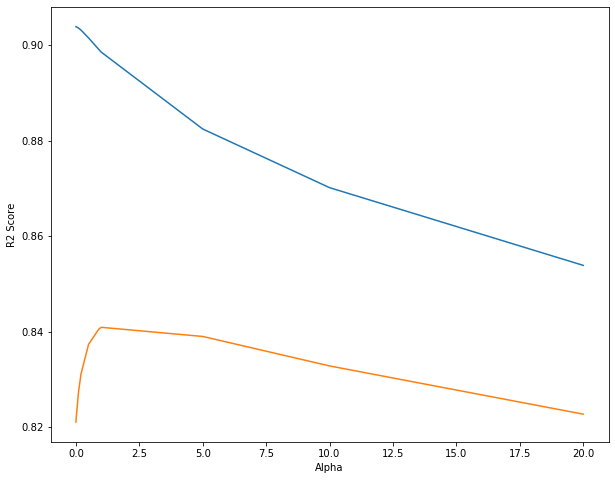

In [407]:

plt.figure(figsize=(10,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [408]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

In [409]:

ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8975951506692146
0.8434690084022436


In [410]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [411]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
24,GarageYrBlt_Old,1.381521
23,YearRemodAdd_Old,0.951214
39,MSSubClass_190,0.741020
58,Neighborhood_BrkSide,0.549498
15,WoodDeckSF,0.532023
18,3SsnPorch,0.486696
7,BsmtUnfSF,0.454216
51,LotConfig_FR2,0.447408
22,YearBuilt_Old,0.428771
13,GrLivArea,0.378565


## Lasso Regression

In [412]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8940130150425512
0.8489107874020096


In [413]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
model_param = [round(x,3) for x in model_param]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_param))

[('Id', -0.681),
 ('LotArea', 0.145),
 ('Street', 0.124),
 ('Utilities', 0.32),
 ('MasVnrArea', 0.377),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.305),
 ('TotalBsmtSF', 0.0),
 ('CentralAir', 0.227),
 ('1stFlrSF', -0.0),
 ('2ndFlrSF', 0.261),
 ('LowQualFinSF', 0.281),
 ('GrLivArea', 0.345),
 ('GarageArea', -0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -2.899),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', -0.0),
 ('PoolArea', 0.0),
 ('MiscVal', -0.09),
 ('YearBuilt_Old', 0.442),
 ('YearRemodAdd_Old', 0.982),
 ('GarageYrBlt_Old', 1.562),
 ('YrSold_Old', -0.0),
 ('MSSubClass_30', -0.373),
 ('MSSubClass_40', -0.18),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', -0.0),
 ('MSSubClass_60', 0.109),
 ('MSSubClass_70', 0.131),
 ('MSSubClass_75', 0.254),
 ('MSSubClass_80', -0.212),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', 0.0),
 ('MSSubClass_120', -0.0),
 ('MSSubClass_160', -0.282),
 ('MSSubClass_180', 0.0),
 ('MSSubClass_190', 0.773),
 ('MSZoning_FV', -0.0)

In [414]:
# Optimize Lasso Regression

In [415]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [416]:

cv_result_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float32')
cv_result_lasso.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004263,0.004618,0.000904,0.001139,0.001,{'alpha': 0.001},0.838670,0.915765,0.769574,0.886550,...,0.904629,0.893557,0.895137,0.893491,0.891442,0.909645,0.894332,0.893016,0.896408,0.005732
1,0.003804,0.003718,0.002741,0.003119,0.010,{'alpha': 0.01},0.819268,0.773253,0.773727,0.785044,...,0.813209,0.813824,0.815161,0.812334,0.808884,0.858920,0.816528,0.812733,0.818695,0.013749
2,0.003667,0.003303,0.001331,0.001207,0.100,{'alpha': 0.1},0.707873,0.644092,0.677839,0.627644,...,0.675822,0.691581,0.675962,0.683023,0.665585,0.719804,0.679002,0.676702,0.683527,0.013771
3,0.005078,0.002318,0.002693,0.001483,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004987,0.001995,0.002594,0.001110,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


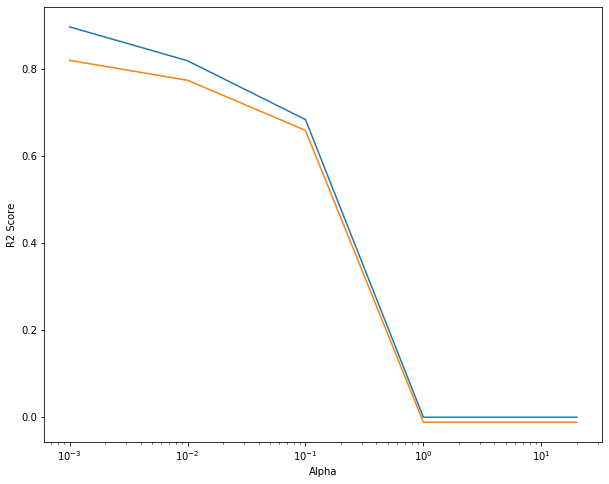

In [417]:
plt.figure(figsize=(10,8))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [418]:
model_cv.best_params_

{'alpha': 0.001}

In [419]:

lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8940130150425512
0.8489107874020096


In [420]:

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coeff = pd.DataFrame(list(zip(cols,model_param)))
lasso_coeff.columns = ['Featuere','Coef']

In [421]:
lasso_coeff.sort_values(by='Coef',ascending=False).head(20)


,Featuere,Coef
24,GarageYrBlt_Old,1.562269
23,YearRemodAdd_Old,0.981681
39,MSSubClass_190,0.772691
22,YearBuilt_Old,0.441982
58,Neighborhood_BrkSide,0.421937
51,LotConfig_FR2,0.404690
4,MasVnrArea,0.377086
70,Neighborhood_NoRidge,0.360131
13,GrLivArea,0.344876
54,LandSlope_Mod,0.341815


#### Since Both Lasso and Ridge are having similar R2 value i.e.. between 0.82 to 0.9, we are going to consider Lasso Regression it will help in feature elimination

In [422]:
lassoModel = Lasso(alpha=0.001)
lassoModel.fit(X_train,y_train)

y_train_pred = lassoModel.predict(X_train)
y_test_pred = lassoModel.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8940130150425512
0.8489107874020096


####  Best Features which impacts the sales price
- GarageYrBlt : Year Built as multiple derived features has high coefficient value
- YearRemodAdd
- Neighborhood_BrkSide
- MasVnrArea
- GrLivArea

Best alpha value for Ridge : {'alpha': 1.0}
Best alpha value for Lasso : {'alpha': 0.001}


In [425]:
# Doubling alpha value in lasso regression
lassoModel = Lasso(alpha=0.002)
lassoModel.fit(X_train,y_train)

y_train_pred = lassoModel.predict(X_train)
y_test_pred = lassoModel.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8878918935834061
0.854479373574407


In [429]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coeff = pd.DataFrame(list(zip(cols,model_param)))
lasso_coeff.columns = ['Featuere','Coef']
lasso_coeff.sort_values(by='Coef',ascending=False).head(20)


,Featuere,Coef
24,GarageYrBlt_Old,1.562269
23,YearRemodAdd_Old,0.981681
39,MSSubClass_190,0.772691
22,YearBuilt_Old,0.441982
58,Neighborhood_BrkSide,0.421937
51,LotConfig_FR2,0.404690
4,MasVnrArea,0.377086
70,Neighborhood_NoRidge,0.360131
13,GrLivArea,0.344876
54,LandSlope_Mod,0.341815


In [427]:
# Doubling the value of alpha for ridge regression

ridge = Ridge(alpha=2)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8923686739596718
0.8450026533472204
